In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import matplotlib.pyplot as plt
from nltk.text import TextCollection
from nltk.tokenize import word_tokenize
import json
import nltk
import csv
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet
from nltk import pos_tag

nltk.download('wordnet')
%matplotlib inline

[nltk_data] Downloading package wordnet to /Users/dingyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:

# 下载停用词和语料库
nltk.download('stopwords')
nltk.download('punkt')

# 加载停用词
stop_words = set(stopwords.words('english'))

# 示例文章
document1 = "We're now just over six hours into an expected four-day temporary pause in fighting between Israel and Hamas. Here’s what has been happening so far: At 07:00 local time (05:00 GMT), the Qatar-brokered deal between the two sides came into force At the heart of this deal is the release of hostages. If all goes to plan at 16:00 local time, the release of the first group of hostages - expected to be 13 women and children - will be brought back from Gaza This truce is supposed to last for a further three days Palestinians displaced from the northern Gaza Strip have been warned by the Israel Defense Forces not to attempt to return home There have already been reports of Palestinians being shot at as they tried to move north As part of the deal, 200 lorries carrying medical aid, food and water are also supposed to cross into Gaza every day Humanitarian supplies began to arrive earlier this morning but aid agency Oxfam was quick to point out that it would not be nearly enough"
document2 = "Large banners hang on the walls of Ofer prison complex in the occupied West Bank – the words “United we will succeed!” picked out in large blue and white letters, alongside the Israeli flag. Later today, 39 Palestinian prisoners are due to arrive here, released from Israeli jails in exchange for 13 hostages held by Hamas. The 39 prisoners will be chosen from a list of 300 women and young people compiled by Israel, accused of a range of offences, from throwing stones to attempted murder. The vast majority of them are being held without trial. Most of those listed are teenage boys – with 40% under the age of 18. Families of the 39 prisoners due for release today will gather later at a nearby checkpoint to receive them. Human rights organisations say the number of Palestinians held without charge in Israeli jails has shot up since the 7 October attacks. There are now thought to be more than 6,000 Palestinians held by Israel on security grounds – many still awaiting trial. Almost every Palestinian family in the West Bank is thought to have had a relative detained by Israel at some point in the past – often in jails inside Israel, making it difficult or impossible for their relatives to visit."
# 构建语料库
corpus = [document1, document2]

# 文本预处理：分词、去停用词
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]
tokenized_corpus = [[word for word in doc if word.isalnum() and word not in stop_words] for doc in tokenized_corpus]

# 构建词典
dictionary = corpora.Dictionary(tokenized_corpus)

# 将文本转换为词袋表示
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

# 训练LDA模型
num_topics = 2  # 设置主题数
lda_model = models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 输出每个主题的关键词
for topic_id in range(num_topics):
    print(f"Topic #{topic_id + 1}:")
    topic_keywords = lda_model.show_topic(topic_id, topn=5)
    keywords = [word for word, _ in topic_keywords]
    print(keywords)
    print()

Topic #1:
['israel', 'held', 'israeli', 'jails', 'prisoners']

Topic #2:
['deal', 'gaza', 'israel', 'palestinians', 'hostages']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dingyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dingyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
tokenized_corpus

[['economy', 'experiencing', 'downturn', 'unemployment', 'rates', 'rising'],
 ['stock',
  'market',
  'showing',
  'signs',
  'recovery',
  'indicating',
  'positive',
  'economic',
  'growth'],
 ['political',
  'leaders',
  'discussing',
  'measures',
  'improve',
  'economy',
  'create',
  'jobs']]

In [30]:
def tokenize(text):
    token_list = nltk.word_tokenize(text)
    # tagged_words = pos_tag(token_list)
    return token_list


def stemmer_words(word):
    stemmer = PorterStemmer()
    # 对每个词进行词干还原
    stemmed_word = stemmer.stem(word)
    return stemmed_word


def lemmatizer_word(word_list):
    tagged_words = pos_tag(word_list)
    tagged_words = clean_by_pos(tagged_words)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for tag in tagged_words:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmatized_words.append(lemmatizer.lemmatize(tag[0], pos=wordnet_pos))
    return lemmatized_words


# 根据词性清理词汇
def clean_by_pos(tagged_words):
    cleaned_tagged_word = []
    include_tag = ["EX", "JJ", "JJR", "JJS", "NN", "NNS", "NNP", "NNPS", "PDT", "RB", "RBR", "RBS", "UH", "VB", "VBD","VBN", "VBP", "VBZ", "NP", "PP", "VP", "ADJP", "ADVP", "PNP", "-SBJ", "-OBJ"]
    for tagged_word in tagged_words:
        if tagged_word[1] in include_tag:
            cleaned_tagged_word.append(tagged_word)
    return cleaned_tagged_word


# 获取单词的词性
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


def load_security_words():
    nltk.download('stopwords')
    stopwords_security_list = stopwords.words('english')
    with open("other_file/glasgow_stop_words.txt", "r") as f:
        stopwords_list = f.read().split('\n')
        stopwords_security_list.extend(stopwords_list)
    with open("other_file/info_security_stopwords.txt", "r") as s:
        info_security_list = s.read().split(', ')
        stopwords_security_list.extend(info_security_list)
    stopwords_security = set(stopwords_security_list)
    return stopwords_security


def remove_stopwords(stopwords_security, word_list):
    cleaned_list = []
    # 利用词干分析过滤掉停用词
    stem_stopwords = [stemmer_words(word) for word in stopwords_security]
    # 词形还原
    word_list = lemmatizer_word(word_list)
    for word in word_list:
        if stemmer_words(word.lower()) not in stem_stopwords:
            cleaned_list.append(word)
    return cleaned_list


# load stopwords
def load_data(year, start_month, end_month):
    count = start_month
    news_data = []
    while count <= end_month:
        with open('output/cleaned_data/cleaned_data_' + year + '_' + format_month(count) + '.json', 'r', encoding='utf-8') as file:
            news_list = json.load(file)
            for news_json in news_list:
                text = news_json['title'] + '.' + news_json['text']
                news_data.append(text)
        count = count + 1
    print("Total amount of data is " + str(len(news_data)))
    return news_data


def format_month(num):
    formatted_str = str(num).zfill(2)
    return formatted_str


def write_file(keyword_counter, year, start_month, end_month):
    word_dict = dict(keyword_counter)
    sorted_data = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
    # 只输出前120个高频词
    with open('output/output_nltk_' + year + '_' + format_month(start_month)
              + '_' + format_month(end_month) + '.json', 'w', encoding='utf-8') as f:
        json.dump(sorted_data[:200], f, indent=4, ensure_ascii=False)


if __name__ == "__main__":

    year = '2023'
    start_month = 4
    end_month = 6

    data = load_data(year, start_month, end_month)
    keyword_list = []
    stopword_list = load_security_words()
    sent = []

    print("start nlkt process")
    for i, content in enumerate(data):
        word_list = tokenize(content)
        word_list_cleaned = remove_stopwords(stopword_list, word_list)
        sent.append(word_list_cleaned)
        keyword_list.extend(word_list_cleaned)
    keyword_counter = Counter(keyword_list)

Total amount of data is 646
start nlkt process


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dingyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# 构建词典
dictionary = corpora.Dictionary(sent)

# 将文本转换为词袋表示
bow_corpus = [dictionary.doc2bow(doc) for doc in sent]

# 训练LDA模型
num_topics = 10  # 设置主题数
lda_model = models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 输出每个主题的关键词
for topic_id in range(num_topics):
    print(f"Topic #{topic_id + 1}:")
    topic_keywords = lda_model.show_topic(topic_id, topn=10)
    keywords = [word for word, _ in topic_keywords]
    print(keywords)

Topic #1:
['file', 'use', 'cybersecurity', 'attack', 'data', 'threat', 'clinic', 'actor', 'victim', 'group']
Topic #2:
['security', 'use', 'attack', 'company', 'file', 'data', 'threat', 'malicious', 'software', 'vulnerability']
Topic #3:
['attack', 'vulnerability', 'security', 'update', 'device', 'file', 'Windows', 'exploit', 'threat', 'code']
Topic #4:
['malware', 'use', 'attack', 'company', 'threat', 'attacker', 'malicious', 'target', 'actor', 'user']
Topic #5:
['data', 'use', 'Snake', 'command', 'attack', 'file', 'key', 'security', 'implant', 'network']
Topic #6:
['attack', 'group', 'operation', 'ransomware', 'threat', 'report', 'target', 'use', 'data', 'cybersecurity']
Topic #7:
['data', 'user', 'access', 'account', 'use', 'password', 'security', 'company', 'Google', 'threat']
Topic #8:
['use', 'malware', 'threat', 'file', 'target', 'new', 'attack', 'group', 'malicious', 'actor']
Topic #9:
['security', 'device', 'AI', 'attack', 'risk', 'report', 'vulnerability', 'threat', 'user', '

Words related to 'pandemic':
implemented: 0.2528
monitored.: 0.2009
recovery: 0.1956
variants: 0.1755
being: 0.1705
has: 0.1502
is: 0.1451
have: 0.1389
disruptions.: 0.1087
out: 0.0994


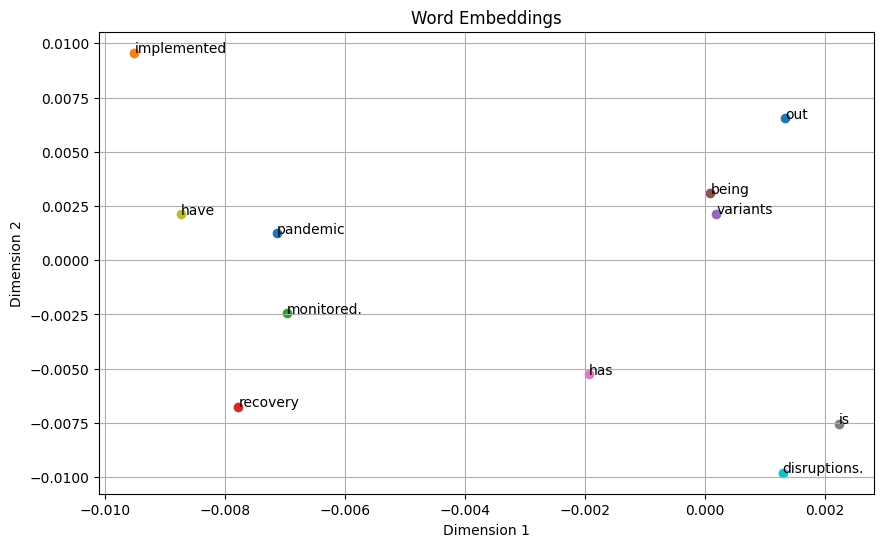

In [22]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# 准备文本数据
texts = [
    "The COVID-19 pandemic has caused global disruptions.",
    "Efforts are being made to develop effective vaccines.",
    "Lockdown measures have been implemented to control the spread.",
    "Economic recovery is a major concern amidst the crisis.",
    "New variants of the virus are being closely monitored.",
    "Vaccination campaigns are being rolled out worldwide."
]

# 数据预处理（分词等）
corpus = [text.lower().split() for text in texts]

# 训练Word2Vec模型
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1)

# 获取与给定词语相关的热点词汇
target_word = "pandemic"
similar_words = model.wv.most_similar(target_word)

# 打印热点词汇
print(f"Words related to '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

# 绘制词向量变化图
words_to_plot = [target_word] + [word for word, _ in similar_words]
vectors = [model.wv[word] for word in words_to_plot]

plt.figure(figsize=(10, 6))
for i, word in enumerate(words_to_plot):
    plt.scatter(vectors[i][0], vectors[i][1])
    plt.annotate(word, (vectors[i][0], vectors[i][1]))

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Word Embeddings")
plt.grid(True)
plt.show()